# 01 – Campaign Performance (Q1 2025)
This notebook demonstrates a clean, professional workflow using **dummy data**.

## Objectives
- Load campaign data
- Compute key metrics (CTR, CPC, CPA, ROAS)
- Visualize trends
- Summarize insights for the case study


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/campaign/campaign_q1_2025.csv')
df['ctr'] = (df['clicks'] / df['impressions']).replace([np.inf, -np.inf], np.nan)
df['cpc'] = (df['spend_usd'] / df['clicks']).replace([np.inf, -np.inf], np.nan)
df['cpa'] = (df['spend_usd'] / df['conversions']).replace([np.inf, -np.inf], np.nan)
df['roas'] = (df['revenue_usd'] / df['spend_usd']).replace([np.inf, -np.inf], np.nan)
df.head()


,date,campaign_id,campaign_name,channel,adset,ad_name,impressions,clicks,spend_usd,conversions,revenue_usd,country,device,placement,ctr,cpc,cpa,roas
0,2025-01-01,C001,Q1-1-Acquisition,TikTok,Adset_4,Creative_8,13964,70,229.42,82,499.87,MY,iOS,In-Stream,0.005013,3.277429,2.797805,2.178842
1,2025-01-01,C002,Q1-2-Acquisition,TikTok,Adset_5,Creative_2,4433,241,1191.04,32,1521.21,MM,iOS,In-Stream,0.054365,4.942075,37.220000,1.277212
2,2025-01-01,C003,Q1-3-Acquisition,Facebook,Adset_1,Creative_10,4747,832,574.48,46,3091.93,VN,Desktop,In-Stream,0.175269,0.690481,12.488696,5.382137
3,2025-01-02,C001,Q1-1-Acquisition,Facebook,Adset_3,Creative_5,5890,696,246.10,38,66.32,TH,Android,Stories,0.118166,0.353592,6.476316,0.269484
4,2025-01-02,C002,Q1-2-Acquisition,Google,Adset_1,Creative_10,4612,389,327.18,59,610.19,PH,Desktop,Search,0.084345,0.841080,5.545424,1.864998


In [7]:
# Channel-level summary
agg = df.groupby('channel')[['impressions','clicks','spend_usd','conversions','revenue_usd']].sum().reset_index()
agg['ctr'] = agg['clicks']/agg['impressions']
agg['cpc'] = agg['spend_usd']/agg['clicks']
agg['cpa'] = agg['spend_usd']/agg['conversions']
agg['roas'] = agg['revenue_usd']/agg['spend_usd']
agg.sort_values('roas', ascending=False)


,channel,impressions,clicks,spend_usd,conversions,revenue_usd,ctr,cpc,cpa,roas
0,Facebook,1130203,48139,58816.29,5844,259927.51,0.042593,1.221801,10.064389,4.419312
1,Google,1065573,48639,55365.69,5823,218901.47,0.045646,1.138298,9.508104,3.953739
2,TikTok,776435,39922,50662.37,3800,186659.72,0.051417,1.269034,13.332203,3.684386


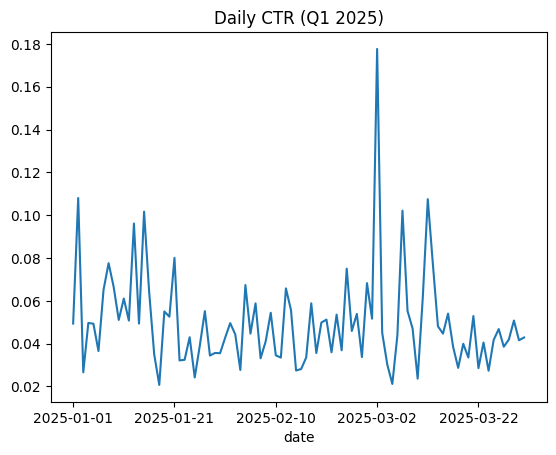

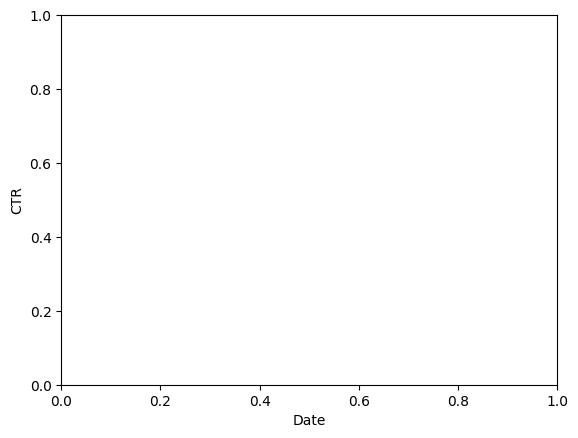

In [9]:
# Daily CTR trend (all channels)
daily = df.groupby('date')[['impressions','clicks','spend_usd','conversions','revenue_usd']].sum()
daily['ctr'] = daily['clicks']/daily['impressions']
plt.figure()
daily['ctr'].plot(title='Daily CTR (Q1 2025)')
from pathlib import Path
Path('../visuals').mkdir(parents=True, exist_ok=True)  # make sure the folder exists
plt.savefig('../visuals/daily_ctr.png', dpi=150, bbox_inches='tight')
plt.show()
plt.savefig('../visuals/daily_ctr.png', dpi=150, bbox_inches='tight')
plt.xlabel('Date'); plt.ylabel('CTR'); plt.show()


## Next Steps
- Add segmented analysis by **country**, **device**, and **placement**
- Export visuals to `/visuals`
- Integrate selected charts/screenshots into the case study
